epoch=0, loss=4268.91113
epoch=100, loss=1148.43738
epoch=200, loss=457.62466
epoch=300, loss=190.46884
epoch=400, loss=87.15165
epoch=500, loss=47.19595
epoch=600, loss=31.74394
epoch=700, loss=25.76828
epoch=800, loss=23.45730
epoch=900, loss=22.56359
epoch=1000, loss=22.21795
epoch=1100, loss=22.08430
epoch=1200, loss=22.03262
epoch=1300, loss=22.01262
epoch=1400, loss=22.00489
epoch=1500, loss=22.00188
epoch=1600, loss=22.00072
epoch=1700, loss=22.00030
epoch=1800, loss=22.00013
epoch=1900, loss=22.00005


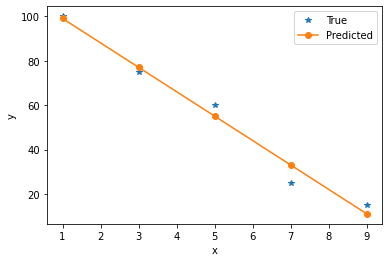

linear.weight tensor([[-10.9987]])
linear.bias tensor([109.9918])
7.0수면 후 피곤한 정도: 33.00


In [ ]:
import torch
import matplotlib.pyplot as plt

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear = torch.nn.Linear(1, 1, bias=True)

    def forward(self, x):
        y_hat = self.linear(x)
        return y_hat

x_lst = torch.Tensor([1, 3, 5, 7, 9]).view(-1, 1)
y_lst = torch.Tensor([100, 75, 60, 25, 15]).view(-1, 1)

net = Net()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

for epoch in range(2000):
    y_hat = net(x_lst)
    loss = criterion(y_hat, y_lst)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch={epoch}, loss={loss.item():0.5f}')

plt.plot(x_lst, y_lst,'*')
plt.plot(x_lst, net(x_lst).detach().numpy(),'-o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(('True','Predicted'))
plt.show()

for name, param in net.named_parameters():
    print(name, param.data)

x_test = torch.Tensor([[7]])
y_test = net(x_test)
print(f'{x_test.item()}수면 후 피곤한 정도: {y_test.item():0.2f}')